# Inférence de L'IA

In [1]:
import torch

print("torch:", torch.__version__)

torch: 2.8.0+cu128


#### Le modèle du multilayer perceptron (MLP)

In [37]:


class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.dropout = torch.nn.Dropout(p=0.1)
        self.fc1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_size, output_size)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        out = self.dropout(x)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out




In [43]:
# IMPORTANT: Run this cell ONLY after restarting the kernel!
# Kernel -> Restart Kernel, then run this cell

import librosa
import numpy as np
import matplotlib.pyplot as plt

print(f"NumPy version: {np.__version__}")
print(f"Librosa version: {librosa.__version__}")

PATH_FOLDER = "../data/archive/DATASET_OF_VOWELS/"

def extract_features(file_path, folder_path=PATH_FOLDER, n_mfcc=13, n_fft=2048, hop_length=512):
    y, sr = librosa.load(folder_path + file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
    return mfccs

print("✅ All libraries imported successfully!")

# Test with a sample file

mffc = extract_features("he_1_ (70).wav")

print(mffc.shape)



NumPy version: 1.24.3
Librosa version: 0.10.1
✅ All libraries imported successfully!
(13, 134)


In [44]:
# train_data

list_vowels_training = ['a', 'e', 'i', 'o', 'u']
list_speaker_training = np.arange(1, 4)
list_numbers_training = np.arange(1, 37)

# test_data

list_vowels_testing = ['a', 'e', 'i', 'o', 'u']
list_speaker_testing = np.arange(1, 4)
list_numbers_testing = np.arange(45, 70)


### Training

In [ ]:

X_train = []
y_train = []

for vowel in list_vowels_training:
    for speaker in list_speaker_training:
        for number in list_numbers_training:
            filename = f"h{vowel}_{speaker}_ ({number}).wav"
            mfcc = extract_features(filename)
            feature_vector = np.mean(mfcc, axis=1)
            X_train.append(feature_vector)
            y_train.append(list_vowels_training.index(vowel))

X_train = np.array(X_train)
y_train = np.array(y_train)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)



Epoch [10/300], Loss: 1.7048 accuracy: 20.00%
Epoch [20/300], Loss: 1.7030 accuracy: 20.19%
Epoch [30/300], Loss: 1.7030 accuracy: 20.19%
Epoch [40/300], Loss: 1.7048 accuracy: 20.00%
Epoch [50/300], Loss: 1.7012 accuracy: 20.37%
Epoch [60/300], Loss: 1.7048 accuracy: 20.00%
Epoch [70/300], Loss: 1.7029 accuracy: 20.19%
Epoch [80/300], Loss: 1.6428 accuracy: 26.30%
Epoch [90/300], Loss: 1.5369 accuracy: 36.85%
Epoch [100/300], Loss: 1.5250 accuracy: 37.96%
Epoch [110/300], Loss: 1.5410 accuracy: 36.48%
Epoch [120/300], Loss: 1.5135 accuracy: 39.07%
Epoch [130/300], Loss: 1.5139 accuracy: 39.07%
Epoch [140/300], Loss: 1.5064 accuracy: 39.81%
Epoch [150/300], Loss: 1.5178 accuracy: 38.70%
Epoch [160/300], Loss: 1.5104 accuracy: 39.44%
Epoch [170/300], Loss: 1.5062 accuracy: 39.81%
Epoch [180/300], Loss: 1.5117 accuracy: 39.26%
Epoch [190/300], Loss: 1.5102 accuracy: 39.44%
Epoch [200/300], Loss: 1.5102 accuracy: 39.44%
Epoch [210/300], Loss: 1.5065 accuracy: 39.81%
Epoch [220/300], Loss:

In [ ]:
input_size = X_train.shape[1]
hidden_size = 64
output_size = len(list_vowels_training)
mlp_model = MLP(input_size, hidden_size, output_size)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=0.0005)

num_epochs = 200
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = mlp_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f} accuracy: {100 * (outputs.argmax(dim=1) == y_train_tensor).float().mean().item():.2f}%")

print("✅ Entraînement terminé !")

Epoch [10/300], Loss: 1.6786 accuracy: 22.41%
Epoch [20/300], Loss: 1.6705 accuracy: 22.78%
Epoch [30/300], Loss: 1.5242 accuracy: 37.78%
Epoch [40/300], Loss: 1.4988 accuracy: 40.37%
Epoch [50/300], Loss: 1.4780 accuracy: 42.04%
Epoch [60/300], Loss: 1.4443 accuracy: 45.56%
Epoch [70/300], Loss: 1.4344 accuracy: 47.41%
Epoch [80/300], Loss: 1.4252 accuracy: 47.59%
Epoch [90/300], Loss: 1.3967 accuracy: 51.11%
Epoch [100/300], Loss: 1.3988 accuracy: 50.00%
Epoch [110/300], Loss: 1.3554 accuracy: 55.37%
Epoch [120/300], Loss: 1.2988 accuracy: 60.74%
Epoch [130/300], Loss: 1.2810 accuracy: 62.04%
Epoch [140/300], Loss: 1.1549 accuracy: 74.63%
Epoch [150/300], Loss: 1.1141 accuracy: 79.44%
Epoch [160/300], Loss: 1.0960 accuracy: 81.48%
Epoch [170/300], Loss: 1.0935 accuracy: 80.56%
Epoch [180/300], Loss: 1.0937 accuracy: 81.67%
Epoch [190/300], Loss: 1.0781 accuracy: 83.15%
Epoch [200/300], Loss: 1.0841 accuracy: 82.59%
Epoch [210/300], Loss: 1.0788 accuracy: 83.89%
Epoch [220/300], Loss:

(63974,)


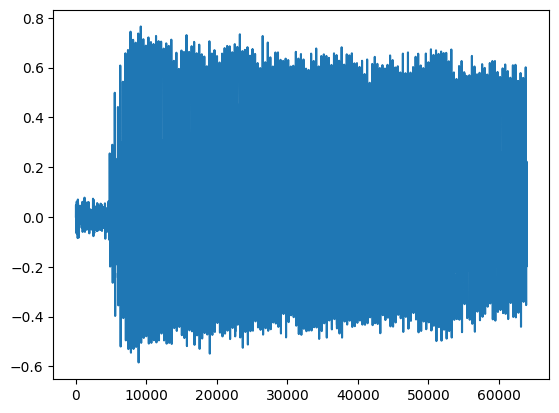

In [63]:
### check 


data = PATH_FOLDER + "he_1_ (1).wav"

signal = librosa.load(data, sr=None)[0]

print(signal.shape)
plt.plot(signal)